In [ ]:
###### load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler, StandardScaler # min/max scaling
import pickle
import seaborn as sns
from matplotlib.colors import LogNorm
from MAPseq_processing import * # import all functions from this script
from MAPseq_plotting import * # import all functions from this script
import matplotlib.lines as mlines # needed for custom legend
from scipy import stats
import random

# import metadata
from M194_M220_metadata import *

# import colormaps
from colormaps import blue_cmp, orange_cmp

%matplotlib inline

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2

In [ ]:
# set-up variables
in_path = '/Volumes/Data/Emily/MAPseq/combined_analysis_M194_M220/processed_data/'
out_path = '/Volumes/Data/Emily/figures/fig_2_mapseq/python_out/'

In [ ]:
#### load data
with open(in_path +'M194_M220_OMC_bin4.pkl', 'rb') as f:
    omc_bin = pickle.load(f)   

#### load data
with open(in_path +'M194_M220_OMC_countN4.pkl', 'rb') as f:
    omc_countN = pickle.load(f)

#     #### load data
# with open(in_path +'M194_M220_ACA_bin4.pkl', 'rb') as f:
#     aca_bin = pickle.load(f)   

# #### load data
# with open(in_path +'M194_M220_ACA_countN4.pkl', 'rb') as f:
#     aca_countN = pickle.load(f)

# Data Processing

In [ ]:
# initial processing
# bin processing
omc_clean = [clean_up_data(df) for df in omc_bin]
omc_type = [sort_by_celltype(df) for df in omc_clean]
omc_preprocess = dfs_preprocess_counts(omc_type) # normalize by dataset median

# countN processing
omc_cleanN = [clean_up_data(df) for df in omc_countN]
omc_typeN = [sort_by_celltype(df) for df in omc_cleanN]
omc_preprocessN = dfs_preprocess_counts(omc_typeN) # normalize by dataset median



# Dot Plots

In [28]:
# IT
omc_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in omc_preprocessN]

plot_df = dfs_to_mean_BC_per_neuron(omc_it, cell_type="IT")


# AUD
area_proportion_dot_plot(plot_df, "AUD", title="IT cells - AUD", to_plot="mean_BC_neuron")
# plt.savefig(out_path+"OMC_AUD_dot_mapseq.svg", dpi=300, bbox_inches="tight")
plt.show()

# OMCc
area_proportion_dot_plot(plot_df, "OMCc", title="IT cells - OMCc", to_plot="mean_BC_neuron")
# plt.savefig(out_path+"OMC_OMCc_dot_mapseq.svg", dpi=300, bbox_inches="tight")
plt.show()


,area,mean_BC_neuron,mice,species,dataset
0,OMCc,1.800704,MMM1,MMus,M194
1,AUD,0.403209,MMM1,MMus,M194
2,STR,2.344306,MMM1,MMus,M194
0,OMCc,1.928107,MMF2,MMus,M194
1,AUD,0.674822,MMF2,MMus,M194
2,STR,2.664296,MMF2,MMus,M194
0,OMCc,1.738387,MMF3,MMus,M194
1,AUD,0.521186,MMF3,MMus,M194
2,STR,2.479016,MMF3,MMus,M194
0,OMCc,1.484617,STM1,STeg,M194


/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


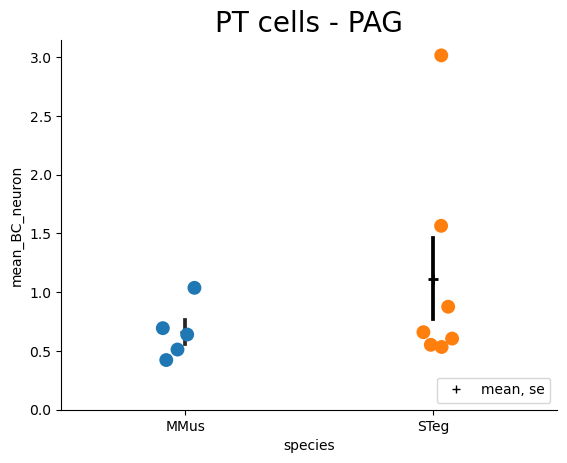

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,


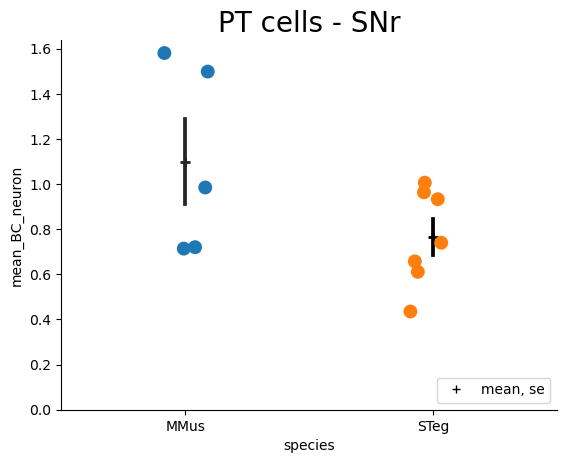

In [30]:
omc_pt = [df[df["type"]=="PT"].drop("type", axis=1) for df in omc_preprocessN]

plot_df = dfs_to_mean_BC_per_neuron(omc_pt, cell_type="PT")

# PAG
area_proportion_dot_plot(plot_df, "PAG", title="PT cells - PAG", to_plot="mean_BC_neuron")
# plt.savefig(out_path+"OMC_PAG_dot_mapseq.svg", dpi=300, bbox_inches="tight")
plt.show()

# SNr
area_proportion_dot_plot(plot_df, "SNr", title="PT cells - SNr", to_plot="mean_BC_neuron")
# plt.savefig(out_path+"OMC_SNr_dot_mapseq.svg", dpi=300, bbox_inches="tight")
plt.show()

## Add down Sampled lab mouse

In [31]:
# processing
omc_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in omc_preprocessN]
omc_it_prop = dfs_to_mean_BC_per_neuron(omc_it, cell_type="IT")

mm_it_sim = sample_mm_all(omc_it)
mm_it_sim_prop = dfs_to_mean_BC_per_neuron(mm_it_sim, cell_type="IT")
mm_it_sim_prop['species'] = "MMus_down_sampled"


omc_pt = [df[df["type"]=="PT"].drop("type", axis=1) for df in omc_preprocessN]
omc_pt_prop = dfs_to_mean_BC_per_neuron(omc_pt, cell_type="PT")

mm_pt_sim = sample_mm_all(omc_pt)
mm_pt_sim_prop = dfs_to_mean_BC_per_neuron(mm_pt_sim, cell_type="PT")
mm_pt_sim_prop['species'] = "MMus_down_sampled"


plot_it = pd.concat([omc_it_prop, mm_it_sim_prop]).reset_index(drop=True)
plot_pt = pd.concat([omc_pt_prop, mm_pt_sim_prop]).reset_index(drop=True)

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.07356718919338619, 0.07357036712603941, 0.07355785218437204)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the f

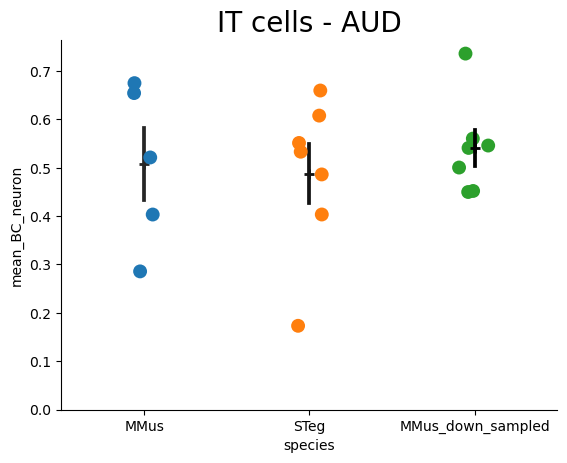

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.07356718919338619, 0.07357036712603941, 0.07355785218437204)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the f

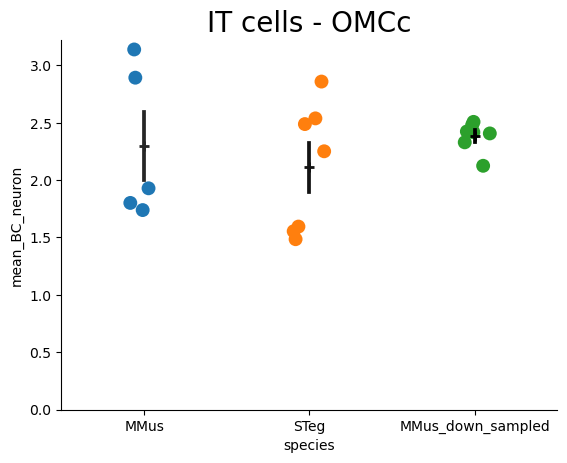

In [33]:
# AUD
area_proportion_dot_plot(plot_it.reset_index(drop=True), "AUD", title="IT cells - AUD", add_legend=False, to_plot="mean_BC_neuron")
# plt.savefig(out_path+"OMC_AUD_mmdown_dot_mapseq.svg", dpi=300, bbox_inches="tight")
plt.show()

# OMCc
area_proportion_dot_plot(plot_it, "OMCc", title="IT cells - OMCc", add_legend=False, to_plot="mean_BC_neuron")
# plt.savefig(out_path+"OMC_OMCc_mmdown_dot_mapseq.svg", dpi=300, bbox_inches="tight")
plt.show()


/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.07356718919338619, 0.07357036712603941, 0.07355785218437204)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the f

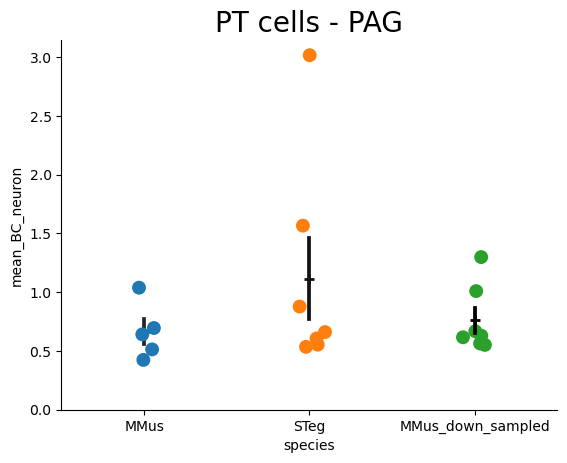

/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.1477136475930195, 0.14772002848141771, 0.1476949000552352)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.07356718919338619, 0.07357036712603941, 0.07355785218437204)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x, y, label=hue_level,
/Users/eisko/miniconda3/envs/MAPseq/lib/python3.10/site-packages/seaborn/categorical.py:1728: UserWarning: You passed a edgecolor/edgecolors ((0.0, 0.0, 0.0)) for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the f

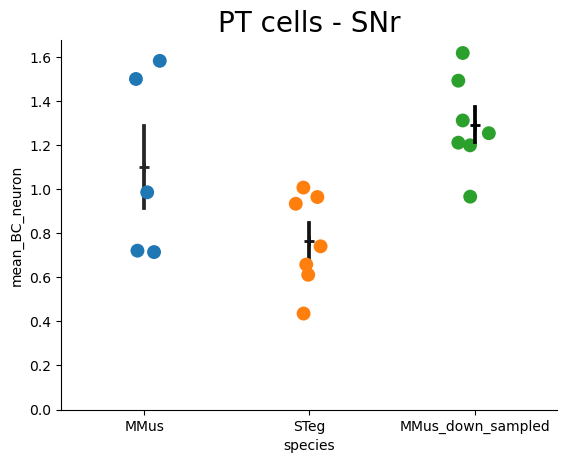

In [34]:
# PAG
area_proportion_dot_plot(plot_pt, "PAG", title="PT cells - PAG", add_legend=False, to_plot="mean_BC_neuron")
# plt.savefig(out_path+"OMC_PAG_mmdown_dot_mapseq.svg", dpi=300, bbox_inches="tight")
plt.show()

# SNr
area_proportion_dot_plot(plot_pt, "SNr", title="PT cells - SNr", add_legend=False, to_plot="mean_BC_neuron")
# plt.savefig(out_path+"OMC_SNr_mmdown_dot_mapseq.svg", dpi=300, bbox_inches="tight")
plt.show()

# Estimated error

In [ ]:
# processing
omc_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in omc_type]
omc_it_prop = dfs_to_proportions(omc_it, cell_type="IT")

mm_it_sim = sample_mm_all(omc_it)
mm_it_sim_prop = dfs_to_proportions(mm_it_sim, cell_type="IT")
mm_it_sim_prop['species'] = "MMus_down_sampled"


omc_pt = [df[df["type"]=="PT"].drop("type", axis=1) for df in omc_type]
omc_pt_prop = dfs_to_proportions(omc_pt, cell_type="PT")

mm_pt_sim = sample_mm_all(omc_pt)
mm_pt_sim_prop = dfs_to_proportions(mm_pt_sim, cell_type="PT")
mm_pt_sim_prop['species'] = "MMus_down_sampled"


sim_it_prop = pd.concat([omc_it_prop, mm_it_sim_prop])
sim_pt_prop = pd.concat([omc_pt_prop, mm_pt_sim_prop])

sim_it_prop['type'] = "IT"
sim_pt_prop['type'] = "PT"

# get rid of STR from pt
sim_pt_prop = sim_pt_prop[sim_pt_prop['area'] != "STR"]

sim_prop = pd.concat([sim_it_prop, sim_pt_prop]).reset_index(drop=True)
sim_prop

## MMus_downsample x STeg

In [ ]:
plot = stvmm_calc_stats(sim_prop, species=["STeg", "MMus", "MMus_down_sampled"])


# scatter
stvmm_area_scatter_type(plot, title="OMC - STeg vs MMus_downsampled", x="STeg", y="MMus_down_sampled")
plt.savefig(out_path+"OMC_scatter_mmdown_mapseq_type.svg", dpi=300, bbox_inches="tight")
plt.show()

# volcano
plot = stvmm_calc_ttest(sim_prop, sp1="MMus_down_sampled", sp2="STeg")
plot_volcano(plot, title="OMC - STeg vs MMus_downsampled", shape='type', xlim=(-3,3))
plt.savefig(out_path+"OMC_volcano_mmdown_mapseq_type.svg", dpi=300, bbox_inches="tight")
plt.show()

# Intra vs. Inter comparisons

In [ ]:
d1 = proportion_comparisons(plot_it, species1="MMus", species2="STeg", label="inter")
d2 = proportion_comparisons(plot_it, species1="MMus", species2="MMus_down_sampled", label="inter")
d3 = proportion_comparisons(plot_it, species1="STeg", species2="MMus_down_sampled", label="inter")
d4 = proportion_comparisons(plot_it, species1="MMus", species2="MMus", label="intra")
d5 = proportion_comparisons(plot_it, species1="STeg", species2="STeg", label="intra")
d6 = proportion_comparisons(plot_it, species1="MMus_down_sampled", species2="MMus_down_sampled", label="intra")

result_it = pd.concat([d1, d2, d3, d4, d5, d6])

inter_it = result_it[result_it['label']=="inter"]
intra_it = result_it[result_it['label']=="intra"]



f1 = area_proportion_dot_plot(inter_it, "OMCc", title="Inter species - OMCc", to_plot="prop_diff", ylim=(0,0.3), add_legend=False)
f3 = area_proportion_dot_plot(intra_it, "OMCc", title="Intra species - OMCc", to_plot="prop_diff", ylim=(0,0.3), add_legend=False)
f2 = area_proportion_dot_plot(inter_it, "AUD", title="Inter species - AUD", to_plot="prop_diff", ylim=(0,0.3), add_legend=False)
f4 = area_proportion_dot_plot(intra_it, "AUD", title="Intra species - AUD", to_plot="prop_diff", ylim=(0,0.3), add_legend=False)

plt.show()


In [ ]:
d1 = proportion_comparisons(plot_pt, species1="MMus", species2="STeg", label="inter")
d2 = proportion_comparisons(plot_pt, species1="MMus", species2="MMus_down_sampled", label="inter")
d3 = proportion_comparisons(plot_pt, species1="STeg", species2="MMus_down_sampled", label="inter")
d4 = proportion_comparisons(plot_pt, species1="MMus", species2="MMus", label="intra")
d5 = proportion_comparisons(plot_pt, species1="STeg", species2="STeg", label="intra")
d6 = proportion_comparisons(plot_pt, species1="MMus_down_sampled", species2="MMus_down_sampled", label="intra")

result_pt = pd.concat([d1, d2, d3, d4, d5, d6])

inter_pt = result_pt[result_pt['label']=="inter"]
intra_pt = result_pt[result_pt['label']=="intra"]



f1 = area_proportion_dot_plot(inter_pt, "PAG", title="Inter species - PAG", to_plot="prop_diff", ylim=(0,0.7), add_legend=False)
f3 = area_proportion_dot_plot(intra_pt, "PAG", title="Intra species - PAG", to_plot="prop_diff", ylim=(0,0.7), add_legend=False)
f2 = area_proportion_dot_plot(inter_pt, "SNr", title="Inter species - SNr", to_plot="prop_diff", ylim=(0,0.7), add_legend=False)
f4 = area_proportion_dot_plot(intra_pt, "SNr", title="Intra species - SNr", to_plot="prop_diff", ylim=(0,0.7), add_legend=False)

plt.show()


In [ ]:
# drop str in result_pt so no repeat areas b/w it and pt
result_pt = result_pt[result_pt['area']!="STR"]

result = pd.concat([result_it, result_pt])

# inter = result[result['label']=="inter"]
# intra = result[result['label']=="intra"]

result_means = result.groupby(['label', 'area']).mean().reset_index()
result_means

sns.scatterplot(result_means, x='label', y="prop_diff", hue="area")
# plt.scatter(result_means['label'], result_means['prop_diff'])
plt.show()

sns.pointplot(result_means, x="label", y="prop_diff", hue="area")
plt.title("OMC - MAPseq proportions")
plt.show()

# Scatterplots

In [35]:
omc_it = [df[df["type"]=="IT"].drop("type", axis=1) for df in omc_preprocessN]
omc_it_prop = dfs_to_mean_BC_per_neuron(omc_it, cell_type="IT")
omc_pt = [df[df["type"]=="PT"].drop(["type"], axis=1) for df in omc_preprocessN]
omc_pt_prop = dfs_to_mean_BC_per_neuron(omc_pt, cell_type="PT")
omc_pt_prop

,area,mean_BC_neuron,mice,species,dataset
0,TH,2.125525,MMM1,MMus,M194
1,HY,0.929801,MMM1,MMus,M194
2,AMY,0.427950,MMM1,MMus,M194
3,SNr,0.720466,MMM1,MMus,M194
4,SCm,0.715918,MMM1,MMus,M194
...,...,...,...,...,...
3,SNr,0.933063,STM7,STeg,M220
4,SCm,1.291964,STM7,STeg,M220
5,PG,1.060439,STM7,STeg,M220
6,PAG,1.564675,STM7,STeg,M220


In [36]:
# combine IT and PT
omc_it_prop['type'] = "IT"
omc_pt_prop['type'] = "PT"

sp_stats_it = stvmm_calc_stats(omc_it_prop, to_plot="mean_BC_neuron")
sp_stats_pt = stvmm_calc_stats(omc_pt_prop, to_plot="mean_BC_neuron")

sp_stats = pd.concat([sp_stats_it,sp_stats_pt])
sp_stats

,area,mean,count,std,sem,ci95,species,type
0,AUD,0.487719,7,0.161280,0.060958,0.119478,STeg,IT
1,OMCc,2.109570,7,0.558346,0.211035,0.413629,STeg,IT
2,STR,3.035830,7,0.716416,0.270780,0.530728,STeg,IT
0,AUD,0.507826,5,0.165685,0.074096,0.145229,MMus,IT
1,OMCc,2.299395,5,0.662449,0.296256,0.580662,MMus,IT
2,STR,2.979751,5,0.769579,0.344166,0.674566,MMus,IT
0,AMY,0.389008,7,0.208280,0.078722,0.154296,STeg,PT
1,BS,1.467513,6,0.879981,0.359251,0.704132,STeg,PT
2,HY,1.047787,7,0.798995,0.301992,0.591903,STeg,PT
3,PAG,1.115259,7,0.912073,0.344731,0.675673,STeg,PT


(11, 9)
(11, 9)


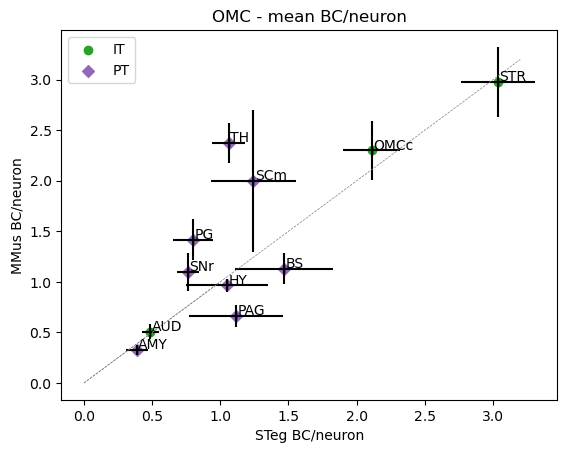

In [43]:

stvmm_area_scatter_type(sp_stats, title="OMC - mean BC/neuron", axis_label="BC/neuron")
# plt.xlim(10,70000)
# plt.ylim(10,70000)

# plot unity line
x = np.linspace(0,3.2, 5)
y = x
plt.plot(x, y, color='grey', linestyle="--", linewidth=0.5)


# plt.savefig(out_path+"OMC_scatter_mapseq_type.svg", dpi=300, bbox_inches="tight")
plt.show()

## volcano plot

In [44]:
omc_prop = pd.concat([omc_it_prop, omc_pt_prop])
omc_prop

,area,mean_BC_neuron,mice,species,dataset,type
0,OMCc,1.800704,MMM1,MMus,M194,IT
1,AUD,0.403209,MMM1,MMus,M194,IT
2,STR,2.344306,MMM1,MMus,M194,IT
0,OMCc,1.928107,MMF2,MMus,M194,IT
1,AUD,0.674822,MMF2,MMus,M194,IT
...,...,...,...,...,...,...
3,SNr,0.933063,STM7,STeg,M220,PT
4,SCm,1.291964,STM7,STeg,M220,PT
5,PG,1.060439,STM7,STeg,M220,PT
6,PAG,1.564675,STM7,STeg,M220,PT


In [45]:
# omc_it_prop['type'] = "IT"
# omc_pt_prop['type'] = "PT"

omc_prop = pd.concat([omc_it_prop, omc_pt_prop])
plot = stvmm_calc_ttest(omc_prop, to_plot="mean_BC_neuron")

plot

,area,p-value,MMus_mean,STeg_mean,fold_change,log2_fc,nlog10_p,type,p<0.05
0,AUD,0.837429,0.507826,0.487719,0.960405,-0.058285,0.077052,IT,False
1,OMCc,0.602090,2.299395,2.109570,0.917446,-0.124305,0.220339,IT,False
2,STR,0.899336,2.979751,3.035830,1.018820,0.026900,0.046078,IT,False
3,AMY,0.532668,0.322815,0.389008,1.205049,0.269092,0.273543,PT,False
4,BS,NaN,1.131474,NaN,NaN,NaN,NaN,PT,False
5,HY,0.825014,0.964658,1.047787,1.086175,0.119257,0.083539,PT,False
6,PAG,0.308004,0.661145,1.115259,1.686862,0.754342,0.511444,PT,False
7,PG,0.030652,1.417109,0.801875,0.565853,-0.821502,1.513535,PT,True
8,SCm,0.298198,1.999984,1.242489,0.621249,-0.686755,0.525495,PT,False
9,SNr,0.094825,1.099879,0.763921,0.694550,-0.525849,1.023079,PT,False


<AxesSubplot: title={'center': 'OMC MAPseq BC/neuron'}, xlabel='$log_{2}$($\\dfrac{STeg\\ mean}{MMus\\ mean}$)', ylabel='$-log_{10}(p\\ value)$'>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


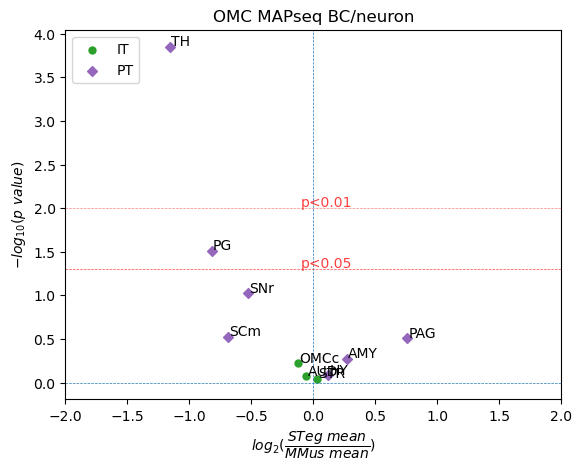

In [47]:

plot_volcano(plot, title="OMC MAPseq BC/neuron", shape="type")
# plt.xlim(-6,2)


# plt.savefig(out_path+"OMC_volcano_mapseq_type.svg", dpi=300, bbox_inches="tight")


## scatter/volcano for downsample MMus vs. Steg

In [48]:
plot_it['type'] = "IT"
plot_pt['type'] = "PT"

sp_stats_it = stvmm_calc_stats(plot_it, to_plot="mean_BC_neuron", species=["STeg", "MMus_down_sampled"])
sp_stats_pt = stvmm_calc_stats(plot_pt, to_plot="mean_BC_neuron", species=["STeg", "MMus_down_sampled"])

sp_stats = pd.concat([sp_stats_it,sp_stats_pt])
sp_stats

,area,mean,count,std,sem,ci95,species,type
0,AUD,0.487719,7,0.161280,0.060958,0.119478,STeg,IT
1,OMCc,2.109570,7,0.558346,0.211035,0.413629,STeg,IT
2,STR,3.035830,7,0.716416,0.270780,0.530728,STeg,IT
0,AUD,0.540678,7,0.096854,0.036607,0.071750,MMus_down_sampled,IT
1,OMCc,2.383858,7,0.127847,0.048322,0.094711,MMus_down_sampled,IT
2,STR,3.096629,7,0.213273,0.080609,0.157995,MMus_down_sampled,IT
0,AMY,0.389008,7,0.208280,0.078722,0.154296,STeg,PT
1,BS,1.467513,6,0.879981,0.359251,0.704132,STeg,PT
2,HY,1.047787,7,0.798995,0.301992,0.591903,STeg,PT
3,PAG,1.115259,7,0.912073,0.344731,0.675673,STeg,PT


(11, 9)
(11, 9)


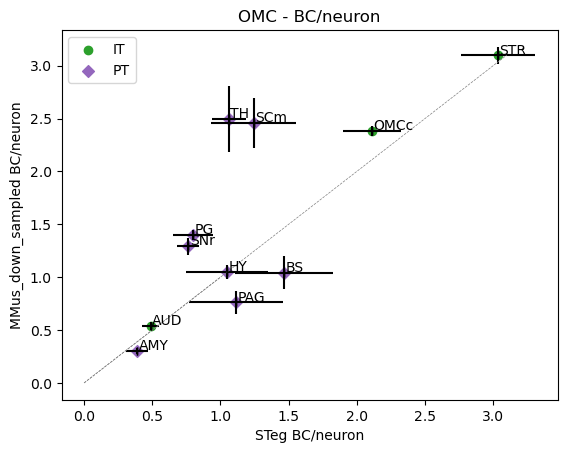

In [52]:

stvmm_area_scatter_type(sp_stats, title="OMC - BC/neuron", axis_label="BC/neuron",
                        x="STeg", y="MMus_down_sampled")
# plt.xlim(1,3.1)
# plt.ylim(1,3.1)

# # plot unity line
x = np.linspace(0,3.1, 5)
y = x
plt.plot(x, y, color='grey', linestyle="--", linewidth=0.5)


# plt.savefig(out_path+"OMC_scatter_mapseq_type.svg", dpi=300, bbox_inches="tight")
plt.show()

In [53]:

# omc_prop = pd.concat([omc_it_prop, omc_pt_prop])
plot_it['type'] = "IT"
plot_pt['type'] = "PT"
total = pd.concat([plot_it, plot_pt])

plot = stvmm_calc_ttest(total, to_plot="mean_BC_neuron", sp1="STeg", sp2="MMus_down_sampled")

plot

,area,p-value,STeg_mean,MMus_down_sampled_mean,fold_change,log2_fc,nlog10_p,type,p<0.05
0,AUD,0.470733,0.487719,0.540678,1.108585,0.148719,0.327225,IT,False
1,OMCc,0.229215,2.109570,2.383858,1.130021,0.176349,0.639757,IT,False
2,STR,0.833228,3.035830,3.096629,1.020027,0.028607,0.079236,IT,False
3,AMY,0.332302,0.389008,0.303818,0.781007,-0.356592,0.478468,PT,False
4,BS,NaN,NaN,1.043610,NaN,NaN,NaN,PT,False
5,HY,0.993591,1.047787,1.050319,1.002416,0.003482,0.002792,PT,False
6,PAG,0.346079,1.115259,0.761268,0.682593,-0.550903,0.460824,PT,False
7,PG,0.002351,0.801875,1.397682,1.743018,0.801587,2.628700,PT,True
8,SCm,0.008653,1.242489,2.461691,1.981258,0.986416,2.062841,PT,True
9,SNr,0.000551,0.763921,1.292088,1.691389,0.758208,3.258706,PT,True


<AxesSubplot: title={'center': 'OMC MAPseq total BC'}, xlabel='$log_{2}$($\\dfrac{STeg\\ mean}{MMus\\ mean}$)', ylabel='$-log_{10}(p\\ value)$'>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


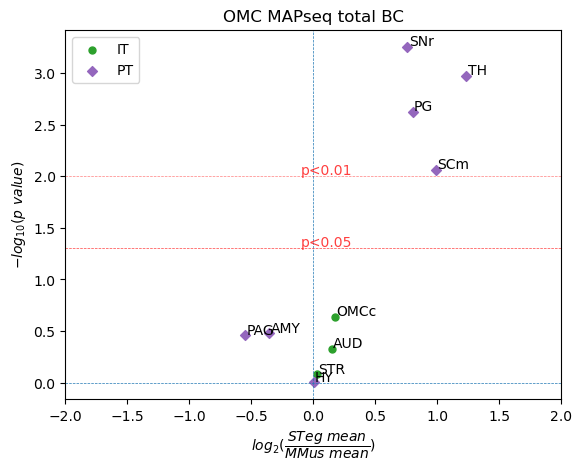

In [54]:

plot_volcano(plot, title="OMC MAPseq BC/neuron", shape="type")
# plt.xlim(-4,4)


# plt.savefig(out_path+"OMC_volcano_mapseq_type.svg", dpi=300, bbox_inches="tight")
